# Unit 14                                Case Study

create a model that can tell if the customer is likely to 
avail a personal loan. This will help in targetted marketting for the customers.



data could be downloaded from the link below

https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling


codes in this file could be copied from SLM in LMS

							
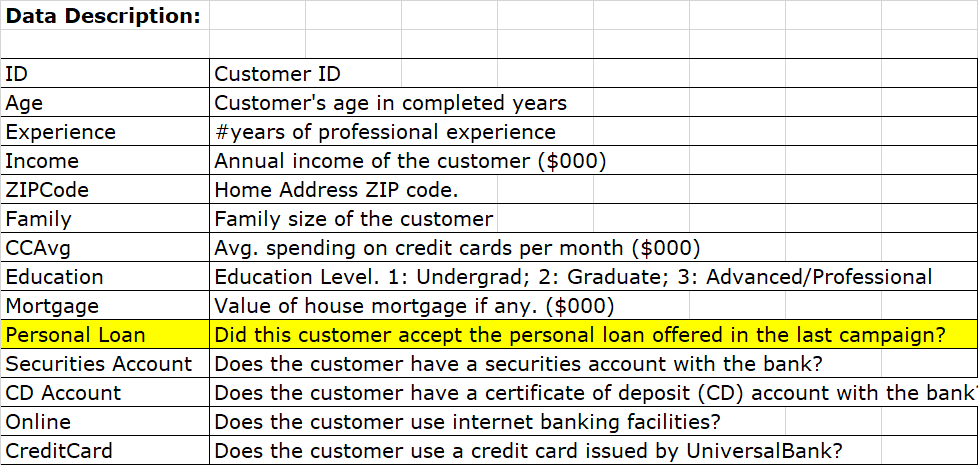

## Steps to do case study or coming on a solution

### Exploratory Data Analysis : This involves identifying the types and count of the data. This also calculates the 5 point summary.

### Data Visualization : In this step, we check the distibution of the continuous and the categorical variables to check if they are appropriately distributed and the data is not extemly skewed or have many outliers .

### Data Imutation/Data Preprocessing : This step involves identifying if any of the rows has missing or incorrect data and replacing it with a 0 or a mean value. We also check the object type to ensure that the continuous variables are of the right type and not incorrectly marked as object In this step, we transform the categorical variables using the one hot swap technique and also normalize the continous variables.

### Split Training And Test Data

### Evaluate Various Techniques : We execute various techniques (with different parameters) on the training data and identify the best parameters based on a cut-off criteria.

### Identification of the best Model : We compare the various results to identify a good model

In [1]:
# import the necessary library

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# read csv file and converting it into dataframe
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name = "Data" )

In [4]:
# displaying first five rows 
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# EXPLORATORY DATA ANALYSIS

In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 we dont have any null values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# some variables are boolian that could be checked by seeing min and max values
# more gap between mean and median, more the variable is skewed

# DATA VISUALIZATION numerical variables

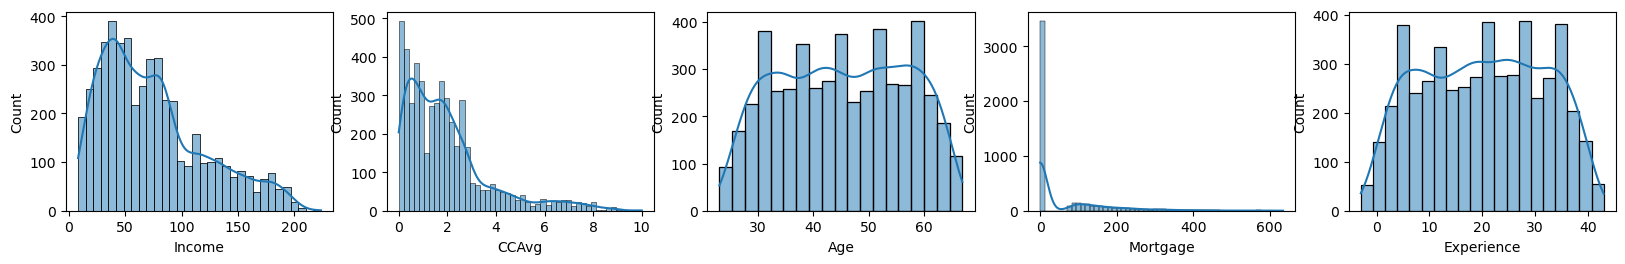

In [9]:
plt.figure(figsize= (20,15)) 
plt.subplot(5,5,1) 
sns.histplot(df.Income, kde=True)
plt.xlabel('Income')

plt.subplot(5,5,2) 
sns.histplot(df.CCAvg, kde=True)
plt.xlabel('CCAvg')

plt.subplot(5,5,3) 
sns.histplot(df.Age, kde=True)
plt.xlabel('Age')

plt.subplot(5,5,4) 
sns.histplot(df.Mortgage, kde=True)
plt.xlabel('Mortgage')

plt.subplot(5,5,5) 
sns.histplot(df.Experience, kde=True)
plt.xlabel('Experience')
plt.show()


#### There are more people with lesser income. Also there are more ppl who have no mortage in this data set. Also low number of ppl with high CCAvg. The age and experience seems to be uniformly distibuted.

([<matplotlib.axis.XTick at 0x255d9056040>,
 [Text(0, 0, 'Not Taken'), Text(1, 0, 'Accepted')])

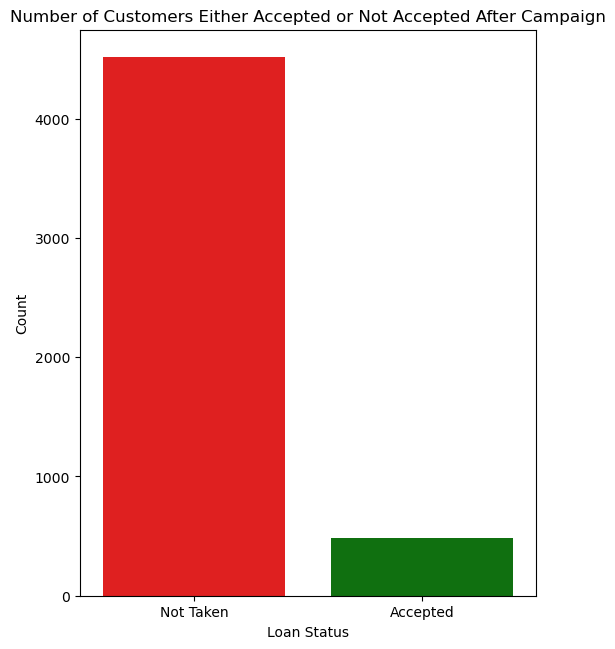

In [10]:
# Displaying the distribution of target variable
plt.figure(figsize=(20, 25))
plt.subplot(3, 3, 1)
sns.countplot(x=df["Personal Loan"], palette=["red", "green"])
plt.title("Number of Customers Either Accepted or Not Accepted After Campaign")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Taken", "Accepted"])


#### The dataset seems to have a very small percentage of people who has taken the loan when compared to those who havent. Ideally we should have a balanced dataset. However, this is not possible always. Therefore, we may have to handle this during modelling.


In [11]:
# Counting the number of instances of each value in Personal Load variable
load_count = df["Personal Loan"].value_counts()

# Displaying the count of 1 and 0 in Personal Load variable
print("Count of Personal Loan")
print(load_count)


Count of Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64


In [12]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

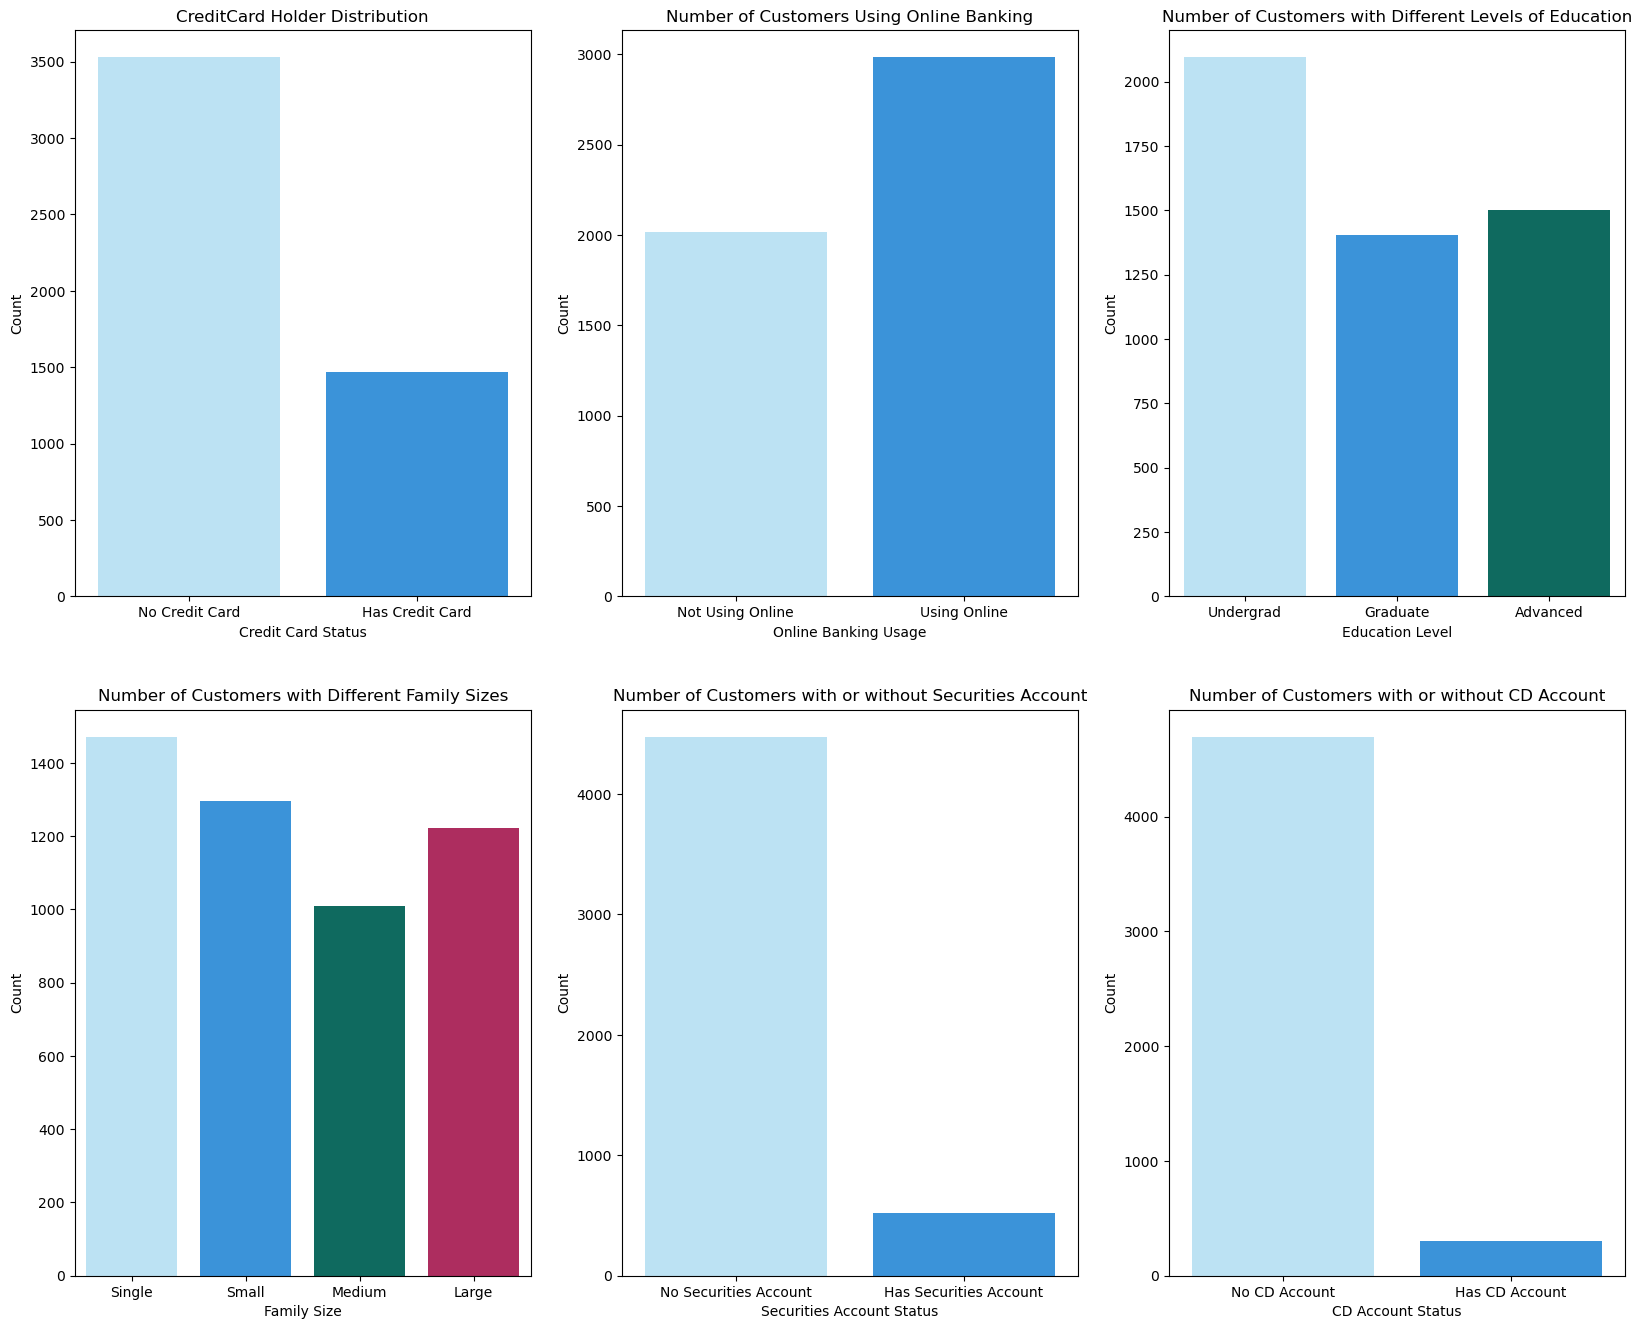

In [13]:
 # Displaying the distribution of categorical variables
plt.figure(figsize=(20, 25))


# CreditCard countplot
plt.subplot(3, 3, 1)
sns.countplot(x=df["CreditCard"], palette=["#b3e5fc", "#2196f3"])
plt.title("CreditCard Holder Distribution")
plt.xlabel("Credit Card Status")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Credit Card", "Has Credit Card"])

# Online countplot
plt.subplot(3, 3, 2)
sns.countplot(x=df["Online"], palette=["#b3e5fc", "#2196f3"])
plt.title("Number of Customers Using Online Banking")
plt.xlabel("Online Banking Usage")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Using Online", "Using Online"])

# Education countplot
plt.subplot(3, 3, 3)
sns.countplot(x=df["Education"], palette=["#b3e5fc", "#2196f3", "#00796b"])
plt.title("Number of Customers with Different Levels of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ["Undergrad", "Graduate", "Advanced"])

# Family countplot
plt.subplot(3, 3, 4)
sns.countplot(x=df["Family"], palette=["#b3e5fc", "#2196f3", "#00796b", "#c2185b"])
plt.title("Number of Customers with Different Family Sizes")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3], ["Single", "Small", "Medium", "Large"])

# Securities Account countplot
plt.subplot(3, 3, 5)
sns.countplot(x=df["Securities Account"], palette=["#b3e5fc", "#2196f3"])
plt.title("Number of Customers with or without Securities Account")
plt.xlabel("Securities Account Status")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Securities Account", "Has Securities Account"])

# CD Account countplot
plt.subplot(3, 3, 6)
sns.countplot(x=df["CD Account"], palette=["#b3e5fc", "#2196f3"])
plt.title("Number of Customers with or without CD Account")
plt.xlabel("CD Account Status")
plt.ylabel("Count")
plt.xticks([0, 1], ["No CD Account", "Has CD Account"])

# Displaying the plot
plt.show()


<Figure size 600x400 with 0 Axes>

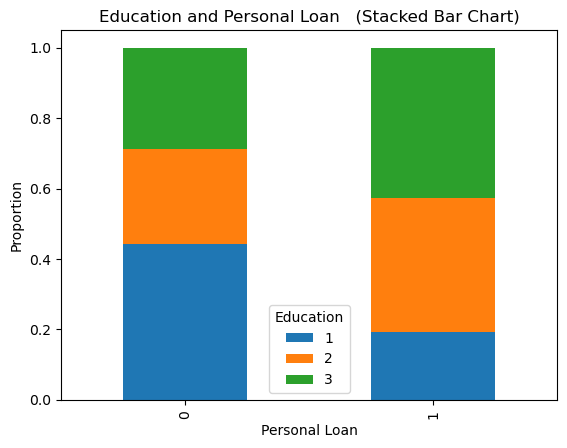

In [14]:
plt.figure(figsize=(6,4))
df.groupby('Personal Loan')['Education'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Education and Personal Loan   (Stacked Bar Chart)')
plt.xlabel('Personal Loan')
plt.ylabel('Proportion')
plt.show()

([<matplotlib.axis.XTick at 0x255d8695cd0>,
 [Text(0, 0, 'Not Taken'), Text(1, 0, 'Accepted')])

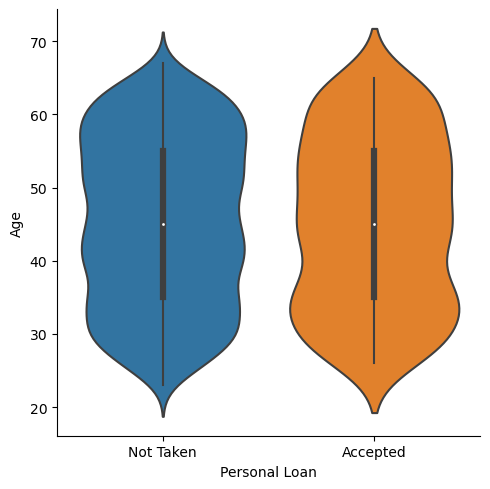

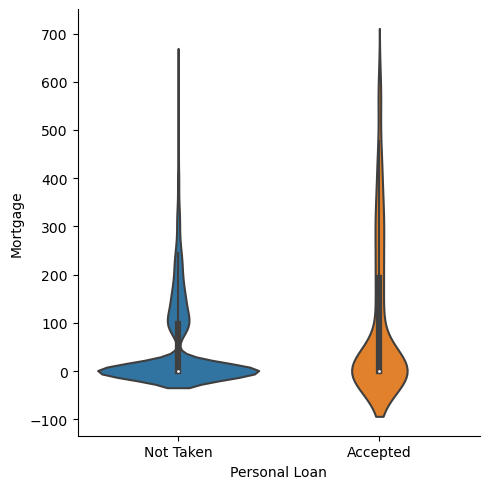

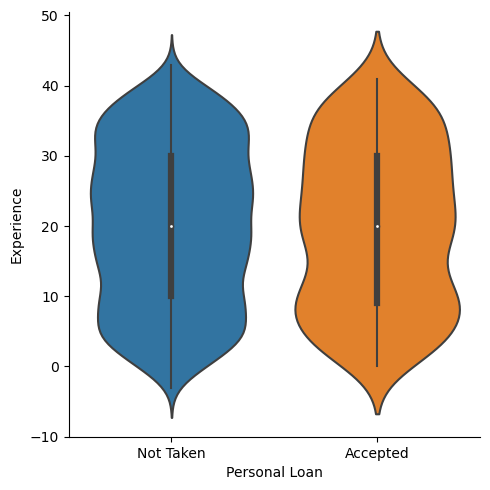

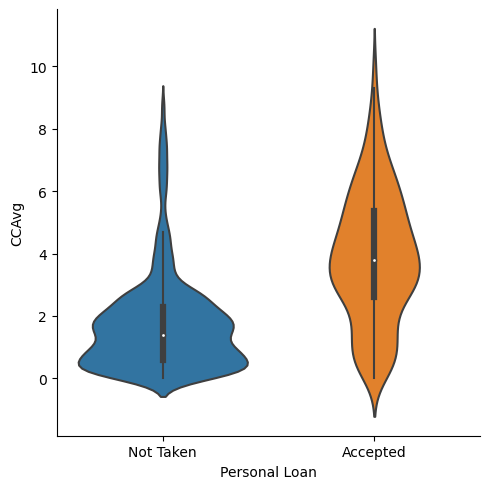

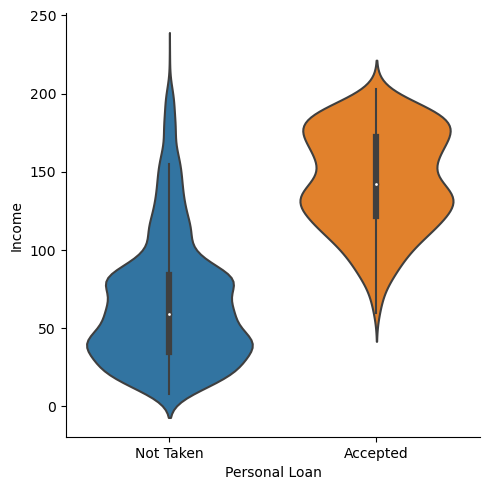

In [15]:
# Analysis of the distibution of the dependent variable on other continuous features
sns.catplot(x="Personal Loan", y="Age", kind="violin", data=df); 
plt.xticks([0, 1], ["Not Taken", "Accepted"])
sns.catplot(x="Personal Loan", y="Mortgage", kind="violin", data=df); 
plt.xticks([0, 1], ["Not Taken", "Accepted"])
sns.catplot(x="Personal Loan", y="Experience", kind="violin", data=df); 
plt.xticks([0, 1], ["Not Taken", "Accepted"])
sns.catplot(x="Personal Loan", y="CCAvg", kind="violin", data=df); 
plt.xticks([0, 1], ["Not Taken", "Accepted"])
sns.catplot(x="Personal Loan", y="Income", kind="violin", data=df);
plt.xticks([0, 1], ["Not Taken", "Accepted"])



with more income, chances are high to take loan

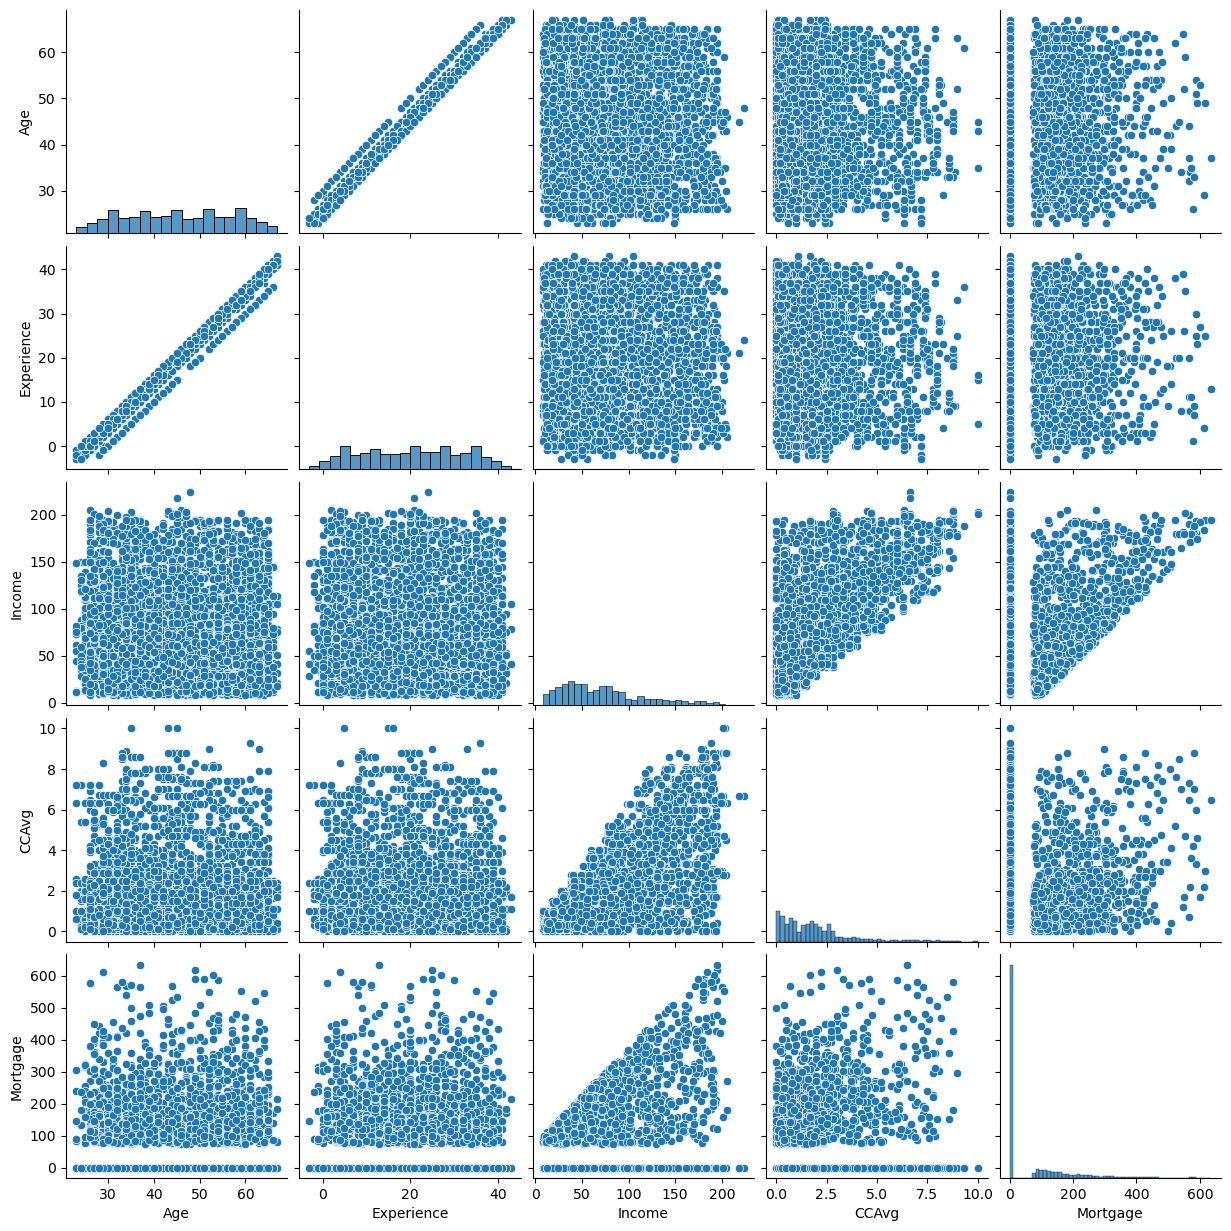

In [16]:
# Lets display the bivariate distribution for all the features
# The pairplot() function in seaborn library is a good tool for that
# lets drop the field that we know are not significatnt
df_temp = df.drop (columns= [ 'ID','ZIP Code'])
# Let us mark the categorical variables. This will give us a better plot
df_temp['Family'] = df['Family'].astype("category")
df_temp['Education'] = df['Education'].astype("category")
df_temp['Personal Loan'] = df['Personal Loan'].astype("category")
df_temp['Securities Account'] = df['Securities Account'].astype("category")
df_temp['CD Account'] = df['CD Account'].astype("category")
df_temp['Online'] = df['Online'].astype("category")
df_temp['CreditCard'] = df['CreditCard'].astype("category")
sns.pairplot ( df_temp )


#### We can see that the Age and Experience column seems to be highly correlated

## lets use the scatter plot with the target variables to understand multifeature relationships

<AxesSubplot:xlabel='Age', ylabel='Experience'>

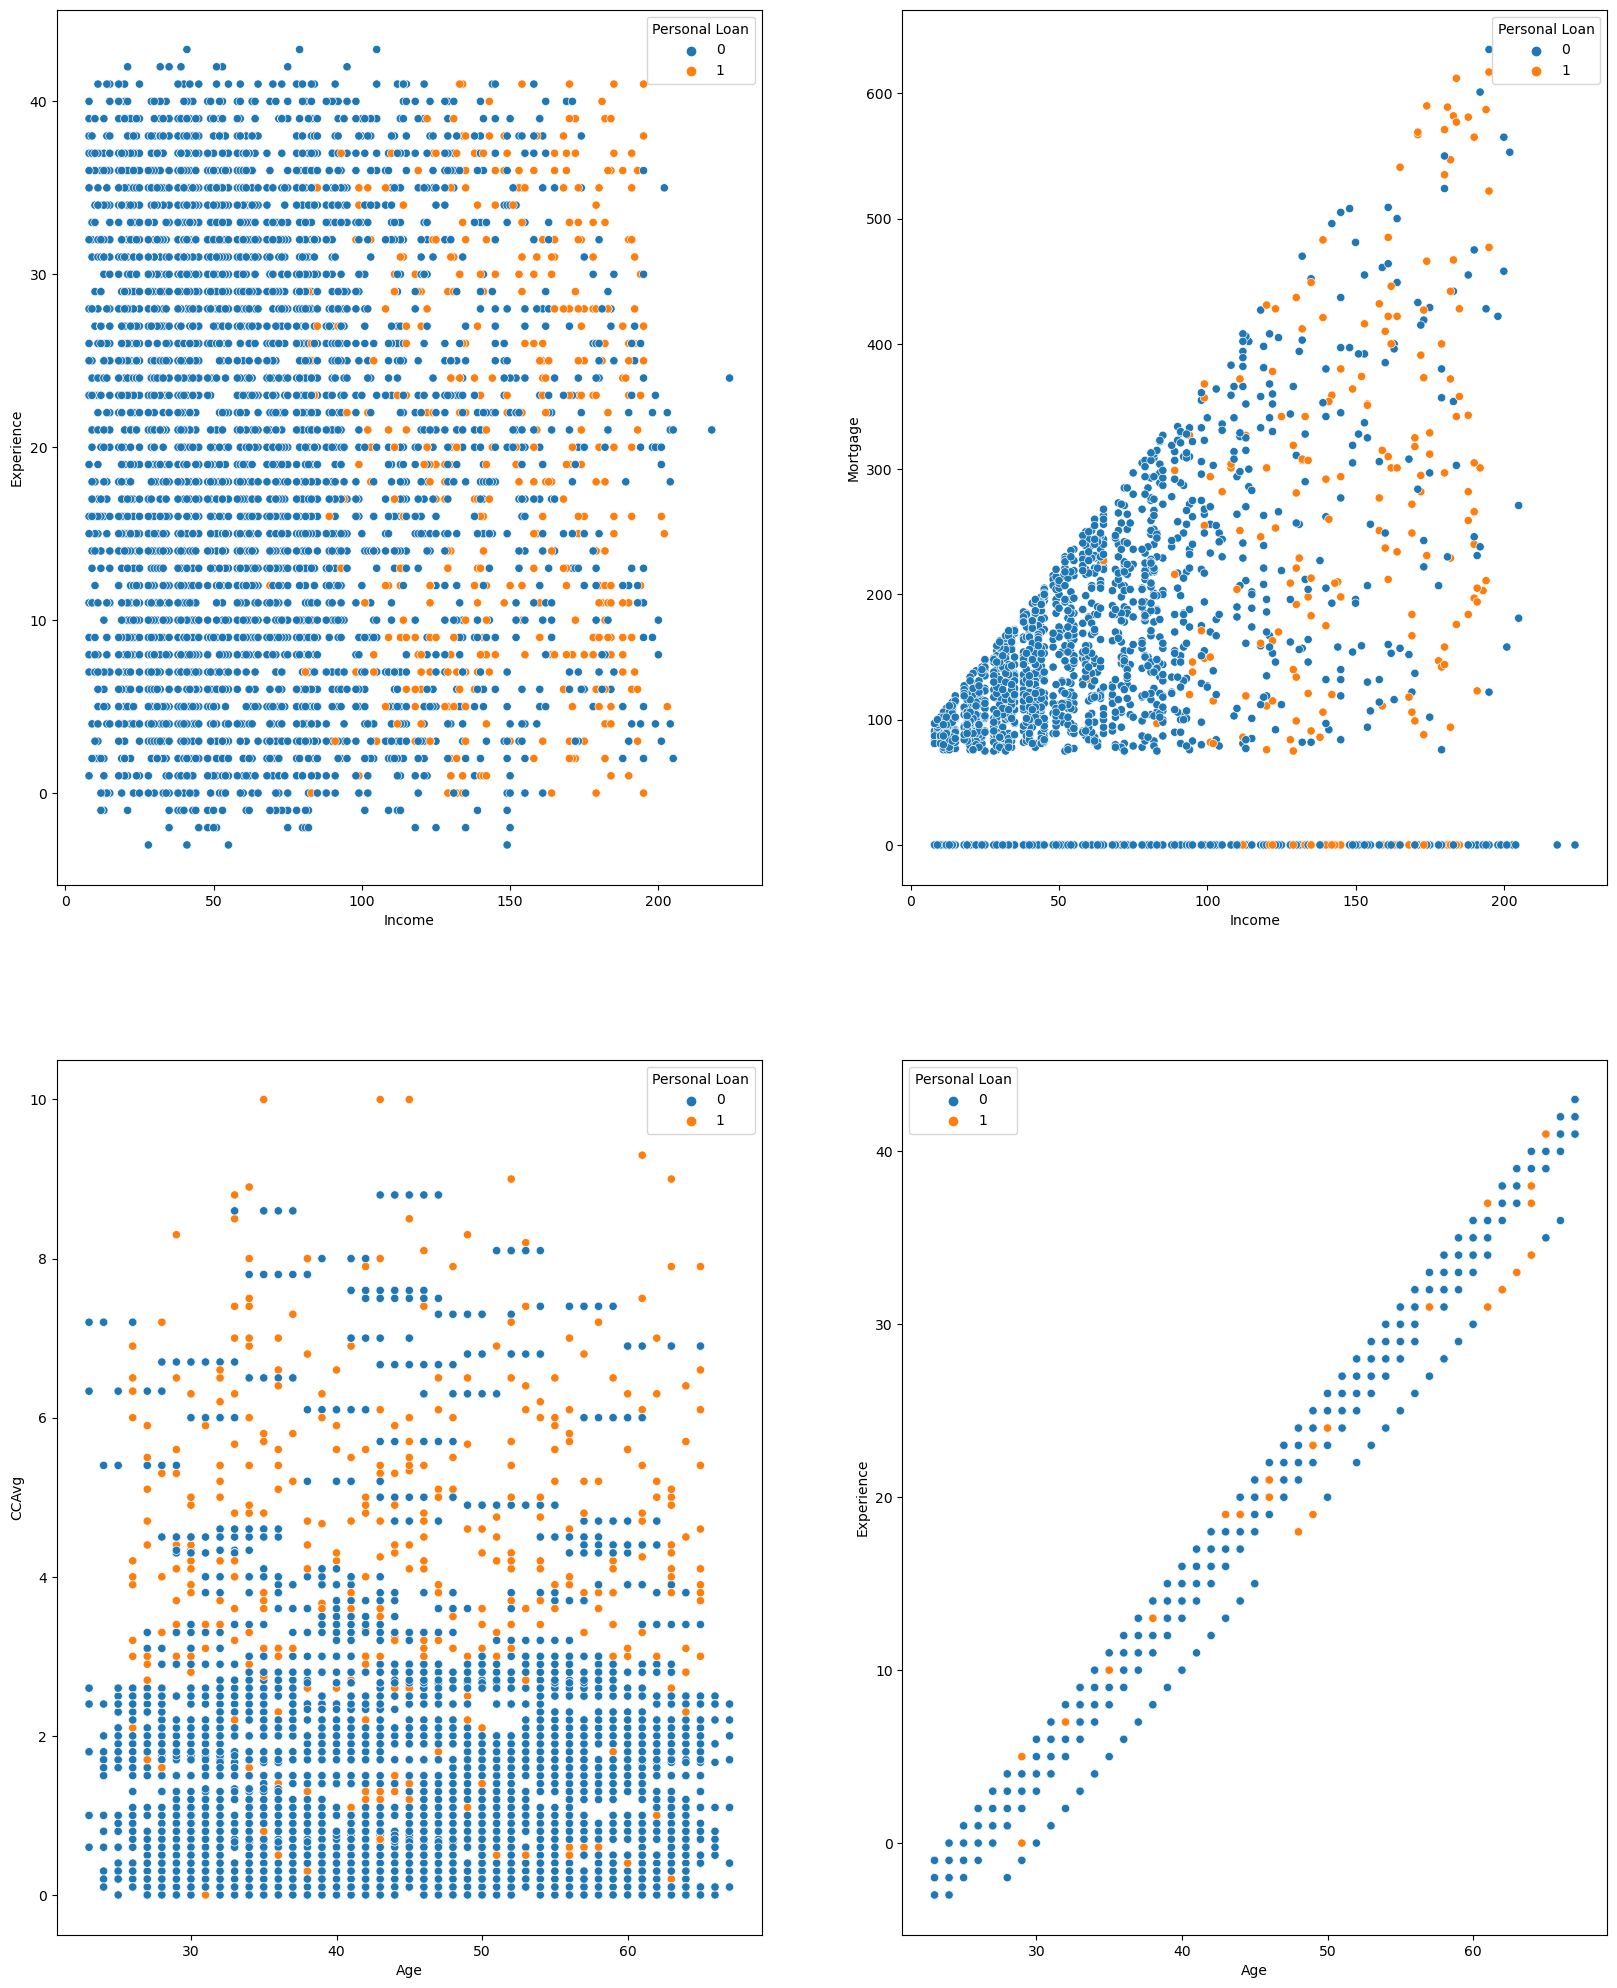

In [17]:
plt.figure(figsize=(20,25))

plt.subplot(2,2,1)
sns.scatterplot ( x='Income', y='Experience', hue='Personal Loan', data=df)     

plt.subplot(2,2,2)
sns.scatterplot ( x='Income', y='Mortgage', hue='Personal Loan', data=df)


plt.subplot(2,2,3)
sns.scatterplot ( x='Age', y='CCAvg', hue='Personal Loan', data=df)

plt.subplot(2,2,4)
sns.scatterplot ( x='Age', y='Experience', hue='Personal Loan', data=df)

### 1. irrespective of experience a person have, more income leads to loan                                                                            2.   ppl with larger mortage also seems to be more potential 



## DATA PREPROCESSING

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### changing into categorical variables into dummy variables and dropping variables

In [19]:
# The first step is to replace the category variables with one hot encoding 
dummy_var1=pd.get_dummies(df['Education'],drop_first=True) 
df_new=pd.concat([df,dummy_var1],axis=1)
df_new=df_new.rename(columns={2: "Edu2" , 3: "Edu3"})
dummy_var2=pd.get_dummies(df['Family'],drop_first=True) 
df_new=pd.concat([df_new,dummy_var2],axis=1)
df_new=df_new.rename(columns={2: "Fam2" , 3: "Fam3", 4: "Fam4", 5: "Fam5" }) 
df_new.head()
df = df_new.drop (['ID', 'ZIP Code', 'Family', 'Education'], axis = 1)


In [20]:
df

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu2,Edu3,Fam2,Fam3,Fam4
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,0,1
1,45,19,34,1.5,0,0,1,0,0,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0
4,35,8,45,1.0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,1,0,0,1,0,0,0
4996,30,4,15,0.4,85,0,0,0,1,0,0,0,0,0,1
4997,63,39,24,0.3,0,0,0,0,0,0,0,1,1,0,0
4998,65,40,49,0.5,0,0,0,0,1,0,1,0,0,1,0


### As a second step, perform standardisation. This will ensure that the mean and the range remains constant

In [21]:
from scipy.stats import zscore
vars = ['Mortgage','Age', 'CCAvg', 'Experience', 'Income'] # non categorical variables
X = df[vars]
df[vars] = X.apply(zscore) 
df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu2,Edu3,Fam2,Fam3,Fam4
0,-1.774417,-1.666078,-0.538229,-0.193371,-0.555524,0,1,0,0,0,0,0,0,0,1
1,-0.029524,-0.096330,-0.864109,-0.250595,-0.555524,0,1,0,0,0,0,0,0,1,0
2,-0.552992,-0.445163,-1.363793,-0.536720,-0.555524,0,0,0,0,0,0,0,0,0,0
3,-0.901970,-0.968413,0.569765,0.436103,-0.555524,0,0,0,0,0,1,0,0,0,0
4,-0.901970,-1.055621,-0.625130,-0.536720,-0.555524,0,0,0,0,1,1,0,0,0,1


## SPLIT TRAIN AND TEST DATA

In [22]:
from sklearn.model_selection import train_test_split
# Removing the dependent column
X_data = df.drop(columns=["Personal Loan"]) 
Y_data = df["Personal Loan"]
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size= 0.4, random_state=1)



In [23]:
y_train.value_counts()

0    2713
1     287
Name: Personal Loan, dtype: int64

In [24]:
y_train.value_counts().to_frame()

,Personal Loan
0,2713
1,287


In [25]:
df_ytrain = y_train.value_counts().to_frame()
df_ytest = y_test.value_counts().to_frame()

In [26]:
df_ytrain

,Personal Loan
0,2713
1,287


In [27]:
print ( "Train Data: Ratio of People who have availed loan" , df_ytrain.iloc[1]/(df_ytrain.iloc[0]+ df_ytrain.iloc[1]) )
print ( "Test Data: Ratio of People who have availed loan" , df_ytest.iloc[1]/(df_ytest.iloc[0]+ df_ytest.iloc[1]) )


Train Data: Ratio of People who have availed loan Personal Loan    0.095667
dtype: float64
Test Data: Ratio of People who have availed loan Personal Loan    0.0965
dtype: float64


## to handle imbalanced data we have to make it balanced

In [28]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [29]:
df_ytrain = y_train.value_counts().to_frame()
df_ytrain

,Personal Loan
0,2713
1,2713


In [30]:
print ( "Train Data: Ratio of People who have availed loan" , df_ytrain.iloc[1]/(df_ytrain.iloc[0]+ df_ytrain.iloc[1]))

Train Data: Ratio of People who have availed loan Personal Loan    0.5
dtype: float64


# MODEL EVALUATION

In [31]:
# create empty dictionary to store results from varous algorithm 

results = {}

## Logistic Regression

In [32]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Create a parameter grid that contains all the values to be # considered to derive the best hyper-parameter value. 
param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-2, 4, 10), 'solver': ['liblinear']}
# We will initialize the StratifiedKFold class. This
# will be used for performing cross validation during Grid Search
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=2)
# Perform a gridsearch on an instance of LogisticRegression for all <→combinations of parameters
# that has been provided in the parameter grid. In this particular use case , evaluation metrics.
model = GridSearchCV(LogisticRegression() , param_grid, cv=cv , scoring = 'recall')
# Fir the model on the training data
model.fit(x_train, y_train)
# Display the best hyper parameters for the model
print ( "Best parameters: " + str( model.best_params_ ) )
# Evaluate the model with unseen data or the test data.
y_predict = model.predict(x_test)
# Display the score on the test data
model_score = model.score(x_test, y_test) 
print ("ROC AUC: " + str(model_score) )
# Display the confusion matrix to identify how many classifications were
# correctly identified and those that were incorrect
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]) 
print("Confusion Matrix:" )
print(cm)

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
ROC AUC: 0.9067357512953368
Confusion Matrix:
[[ 175   18]
 [ 270 1537]]


In [33]:
# Display the list of metrics like Accuracy, Precision, Recall and F1-Score
print("Final Metrics:")
accuracy = str( metrics.accuracy_score(y_test, y_predict)) 
recall = str(metrics.recall_score(y_test, y_predict)) 
precision = str(metrics.precision_score(y_test, y_predict)) 
f1 = str(metrics.f1_score(y_test, y_predict) )
print( " Accuracy: " + accuracy ) 
print( " Recall: " + recall) 
print( " Precision: " + precision) 
print( " F1: " + f1)
results.update({ 'Logistic Regression':{ 'Accuracy': accuracy, 'Recall': recall}})


Final Metrics:
 Accuracy: 0.856
 Recall: 0.9067357512953368
 Precision: 0.39325842696629215
 F1: 0.5485893416927901


# Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
# Initialize the parameters and CV class
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)} 
cv= StratifiedKFold(n_splits=10,shuffle=True,random_state=2)

# Perform the GridSearch to derive the best parameters
model = GridSearchCV(GaussianNB() , param_grid, cv=cv , scoring = 'recall') 
model.fit(x_train, y_train)
print ( "Best parameters: " + str( model.best_params_ ) )


Best parameters: {'var_smoothing': 0.04328761281083057}


In [35]:
# Evaluate the model on unseen data 
y_predict = model.predict(x_test) 
model_score = model.score(x_test, y_test) 
print ("Score: " + str(model_score) )

Score: 0.8031088082901554


In [36]:
# Display the confusion matrix to identify how many classifications were 
# correctly identified and those that were incorrect 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]) 
print("Confusion Matrix:" )
print(cm)


Confusion Matrix:
[[ 155   38]
 [ 229 1578]]


In [37]:
# Display the list of metrics like Accuracy, Precision, Recall and F1-Score
print("Final Metrics:")
accuracy = str( metrics.accuracy_score(y_test, y_predict)) 
recall = str(metrics.recall_score(y_test, y_predict))
precision = str(metrics.precision_score(y_test, y_predict)) 
f1 = str(metrics.f1_score(y_test, y_predict) )
print( " Accuracy: " + accuracy ) 
print( " Recall: " + recall)
print( " Precision: " + precision) 
print( " F1: " + f1)
results.update({ 'Gaussian Naive Bayes':{ 'Accuracy': accuracy, 'Recall': recall }})

Final Metrics:
 Accuracy: 0.8665
 Recall: 0.8031088082901554
 Precision: 0.4036458333333333
 F1: 0.537261698440208


# KNN Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# it is important to find ideal number of neibhours
param_grid = {'n_neighbors': range(2,30)}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)



In [39]:
# As a part of gridsearch, the model will be evaluated for different # values of neighbours provided.
model = GridSearchCV(KNeighborsClassifier() , param_grid, cv=cv , scoring = 'recall')
model.fit(x_train, y_train)

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)}, scoring='recall')

In [40]:
# The ideal value of 'k' or the number of neighbours is available # after the 'fit' operation
print ( "Best parameters: " + str( model.best_params_ ) )

Best parameters: {'n_neighbors': 5}


In [41]:
# Evalaute the model on the unseen data 
y_predict = model.predict(x_test) 
model_score = model.score(x_test, y_test) 
print ("Score: " + str(model_score) )


Score: 0.8082901554404145


C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [42]:
# Display the confusion matrix to identify how many classifications were # correctly identified and those that were incorrect 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]) 
print("Confusion Matrix:" )
print(cm)

Confusion Matrix:
[[ 156   37]
 [ 119 1688]]


In [43]:
# Display the list of metrics like Accuracy, Precision, Recall and F1-Score
print("Final Metrics:")
accuracy = str( metrics.accuracy_score(y_test, y_predict)) 
recall = str(metrics.recall_score(y_test, y_predict))
precision = str(metrics.precision_score(y_test, y_predict)) 
f1 = str(metrics.f1_score(y_test, y_predict) )
print( " Accuracy: " + accuracy ) 
print( " Recall: " + recall)
print( " Precision: " + precision) 
print( " F1: " + f1)
results.update({ 'KNN':{ 'Accuracy': accuracy, 'Recall': recall }})


Final Metrics:
 Accuracy: 0.922
 Recall: 0.8082901554404145
 Precision: 0.5672727272727273
 F1: 0.6666666666666667


# SVM

In [44]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# The important tuning parameters of SVM are 'C', 'gamma' 
# and the 'kernel'. Create a parameter grid with different 
# values for each of this that needs to be evaluated. 
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']} 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
model = GridSearchCV(svm.SVC() , param_grid, cv=cv , scoring = 'recall')
# Perform the fit operation on the intialize model to train
model.fit(x_train, y_train)
# Display the parameters that provided the best parameters during the training
print ( "Best parameters: " + str( model.best_params_ ) )
# Evalaute the model using the unseen data 
y_predict = model.predict(x_test) 
model_score = model.score(x_test, y_test) 
print ("Score: " + str(model_score) )
# Display the confusion matrix to identify how many classifications were 
# correctly identified and those that were incorrect 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]) 
print("Confusion Matrix:" )
print(cm)
# Display the list of metrics like Accuracy, Precision, Recall and F1-Score
print("Final Metrics:")

accuracy = str( metrics.accuracy_score(y_test, y_predict)) 
recall = str(metrics.recall_score(y_test, y_predict)) 
precision = str(metrics.precision_score(y_test, y_predict))
f1 = str(metrics.f1_score(y_test, y_predict) )
print( " Accuracy: " + accuracy) 
print( " Recall: " + recall) 
print( " Precision: " + precision) 
print( " F1: " + f1)
results.update({ 'SVM':{ 'Accuracy': accuracy, 'Recall': recall }})


Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Score: 0.6217616580310881
Confusion Matrix:
[[ 120   73]
 [  46 1761]]
Final Metrics:
 Accuracy: 0.9405
 Recall: 0.6217616580310881
 Precision: 0.7228915662650602
 F1: 0.6685236768802227


# Stochastic Gradient Descent

In [45]:
from sklearn.linear_model import SGDClassifier
# The parameters of stochastic gradient descent are the los to be considered, 
# the learning rate , regularization parameters
param_grid = {"loss" : ["hinge", "log_loss"], "alpha" : [0.0001, 0.001, 0.01, 0.1]}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
model = GridSearchCV(SGDClassifier() , param_grid, cv=cv , scoring = 'recall')

# Fit the model. This will perform the gridsearch on all the combinations of 
# parameters provided. This uses cross-validation during each evaluation.
model.fit(x_train, y_train)


# Display the best parametes
print ( "Best parameters: " + str( model.best_params_ ) )


# Evaluate the model on unseen data 
y_predict = model.predict(x_test) 
model_score = model.score(x_test, y_test) 
print ("ROC AUC: " + str(model_score) )


# Display the confusion matrix to identify how many classifications were 
# correctly identified and those that were incorrect 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]) 
print("Confusion Matrix:" )
print(cm)

# Display the list of metrics like Accuracy, Precision, Recall and F1-Score
print("Final Metrics:")
accuracy = str( metrics.accuracy_score(y_test, y_predict)) 
recall = str(metrics.recall_score(y_test, y_predict))
precision = str(metrics.precision_score(y_test, y_predict)) 
f1 = str(metrics.f1_score(y_test, y_predict) )
print( " Accuracy: " + accuracy ) 
print( " Recall: " + recall)
print( " Precision: " + precision) 
print( " F1: " + f1)

results.update({ 'SGD':{ 'Accuracy': accuracy, 'Recall': recall }})



Best parameters: {'alpha': 0.1, 'loss': 'hinge'}
ROC AUC: 0.8963730569948186
Confusion Matrix:
[[ 173   20]
 [ 252 1555]]
Final Metrics:
 Accuracy: 0.864
 Recall: 0.8963730569948186
 Precision: 0.40705882352941175
 F1: 0.5598705501618123


C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\davidc\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "C:\Users\davidc\A

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
# The evaluation parameter and the different values it can take
# for this algorithm is initialized as a grid as shown below 
param_grid = {'max_features':[1,3,10], 'min_samples_split':[2,3,10], 'min_samples_leaf':[1,3,10], 'bootstrap':[False, True], 
    'n_estimators':[50], 'criterion':['gini']}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
model = GridSearchCV(RandomForestClassifier() , param_grid, cv=cv , scoring = 'recall')

# 'Fit' the model to derive the best value
model.fit(x_train, y_train)
# Display the parameters that yielded the best results
print ( "Best parameters: " + str( model.best_params_ ) )
# Evaluate the model on unseen data 
y_predict = model.predict(x_test) 
model_score = model.score(x_test, y_test) 
print ("ROC AUC: " + str(model_score) )

# Display the confusion matrix to identify how many classifications were # correctly identified and those that were incorrect 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]) 
print("Confusion Matrix:" )
print(cm)

# Display the list of metrics like Accuracy, Precision, Recall and F1-Score
print("Final Metrics:")
accuracy = str( metrics.accuracy_score(y_test, y_predict)) 
recall = str(metrics.recall_score(y_test, y_predict))
precision = str(metrics.precision_score(y_test, y_predict)) 
f1 = str(metrics.f1_score(y_test, y_predict) )
print( " Accuracy: " + accuracy ) 
print( " Recall: " + recall)
print( " Precision: " + precision) 
print( " F1: " + f1)
results.update({ 'Random Forest Classifier':{ 'Accuracy': accuracy, 'Recall': recall }})




Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}
ROC AUC: 0.9222797927461139
Confusion Matrix:
[[ 178   15]
 [  54 1753]]
Final Metrics:
 Accuracy: 0.9655
 Recall: 0.9222797927461139
 Precision: 0.7672413793103449
 F1: 0.8376470588235293


# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
# The evaluation parameter and the different values it can take
# for this algorithm is initialized as a grid as shown below 
param_grid = {'max_features':[1,3,10], 'min_samples_split':[2,3,10], 'min_samples_leaf':[1,3,10], 'bootstrap':[False, True], 
    'n_estimators':[50], 'criterion':['gini']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
model = GridSearchCV(RandomForestClassifier() , param_grid, cv=cv , scoring ='recall')

# 'Fit' the model to derive the best value
model.fit(x_train, y_train)
# Display the parameters that yielded the best results
print ( "Best parameters: " + str( model.best_params_ ) )
# Evaluate the model on unseen data 
y_predict = model.predict(x_test) 
model_score = model.score(x_test, y_test) 
print ("ROC AUC: " + str(model_score) )
# Display the confusion matrix to identify how many classifications were # correctly identified and those that were incorrect 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]) 
print("Confusion Matrix:" )
print(cm)
# Display the list of metrics like Accuracy, Precision, Recall and F1-Score
print("Final Metrics:")
accuracy = str( metrics.accuracy_score(y_test, y_predict)) 
recall = str(metrics.recall_score(y_test, y_predict))
precision = str(metrics.precision_score(y_test, y_predict)) 
f1 = str(metrics.f1_score(y_test, y_predict) )
print( " Accuracy: " + accuracy ) 
print( " Recall: " + recall)
print( " Precision: " + precision) 
print( " F1: " + f1)
results.update({ 'Random Forest Classifier':{ 'Accuracy': accuracy, 'Recall': recall }})



Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
ROC AUC: 0.917098445595855
Confusion Matrix:
[[ 177   16]
 [  41 1766]]
Final Metrics:
 Accuracy: 0.9715
 Recall: 0.917098445595855
 Precision: 0.8119266055045872
 F1: 0.8613138686131387


#### This problem requires to maxmize the ‘True Postives’ and ‘True Negatives’ ( Accuracy) and min- imize the ‘False Negatives’ (Recall Ratio). This will ensure that maximum customers  who are predicted to take the loan avails the same and the customers who avail the loan are not missed in the prediction.

In [48]:
pd.DataFrame(results).T

,Accuracy,Recall
Logistic Regression,0.856,0.9067357512953368
Gaussian Naive Bayes,0.8665,0.8031088082901554
KNN,0.922,0.8082901554404145
SVM,0.9405,0.6217616580310881
SGD,0.864,0.8963730569948186
Random Forest Classifier,0.9715,0.917098445595855


### From the above table, we can see that the best results are obtained from a Random Forest Classifier based Model